In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Exploratory Data Analysis and Data Preprocessing

### 1. Loading the dataset
The dataset is taken from <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud/download">Kaggle Credit Card Fraud Detection Dataset</a>

In [2]:
df = pd.read_csv('creditcard.csv')

### 2. Viewing the first 5 entries of the dataset

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### 3. Getting the dataset shape

In [4]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


### 4. A peek at the dataset

In [5]:
df.sample(5)
# df.sample returns a random sample of items from an axis of the object

Time        V1        V2        V3        V4        V5        V6  \
192939  129920.0 -0.344222  1.845993 -2.228648 -0.655596  2.280888 -0.881907   
182378  125371.0  2.007779 -0.437407 -1.167300  0.083982 -0.225031 -0.563935   
157097  109505.0 -0.662881  1.460177 -0.417145 -0.301444  1.365042  0.230120   
269361  163637.0  1.913259 -0.404109 -1.331444  0.490749  0.077381 -0.379044   
32182    36673.0 -1.240253 -0.259746  0.773953 -1.958902 -1.383149 -0.702055   

              V7        V8        V9  ...       V21       V22       V23  \
192939  1.637754 -0.346547 -0.700365  ...  0.111313  0.445136 -0.309469   
182378 -0.184696 -0.009382  1.123149  ... -0.154343 -0.320786  0.167848   
157097  0.739617  0.035201  1.503654  ...  0.220098  1.231202 -0.106018   
269361  0.084666 -0.182381  1.048875  ...  0.128064  0.533600 -0.016280   
32182   0.515771 -0.209562 -2.936098  ... -0.421431 -0.740812  0.250504   

             V24       V25       V26       V27       V28  Amount  Class  
192939 -0.063280 -0.398586  0.499255  0.003327  0.326485    0.76      0  
182378 -0.439044 -0.104808 -0.079172 -0.041780 -0.072077   14.00      0  
157097 -1.163711 -0.641915 -0.103795  0.338498  0.342850    0.90      0  
269361  0.655475  0.278113 -0.174824 -0.013407 -0.039707   71.97      0  
32182   0.484735 -0.250643 -0.609325 -0.504900 -0.112905  152.90      0  

[5 rows x 31 columns]

### 5. Finding more details of the dataset 

In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking if there are any null values in our dataset
df.isnull().values.any()

False

In [8]:
# numerical summary -> only non-anonymized columns of interest (not the columns encoded by PCA)
pd.set_option('precision', 3) # to get the result upto 3 decimal places
df.loc[:, ['Time', 'Amount']].describe() # Statistics of the columns not encoded by PCA

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

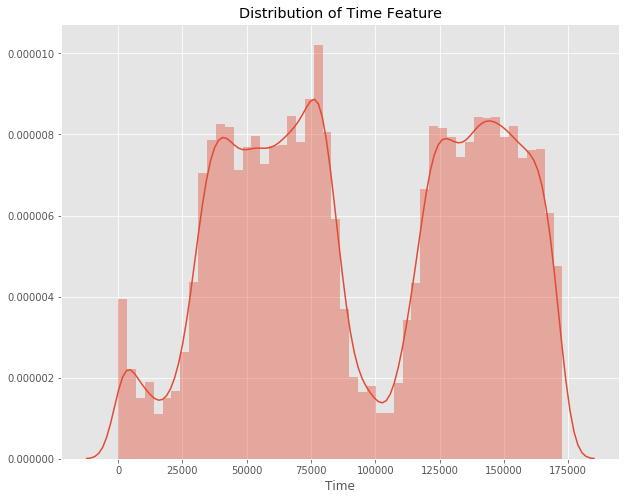

In [9]:
# visualizations of the time feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

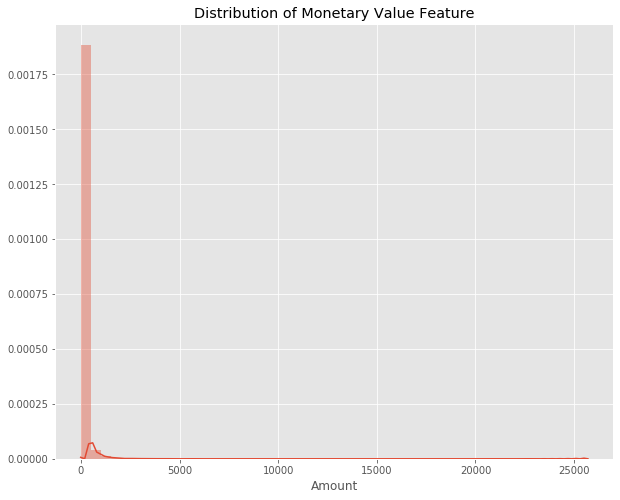

In [10]:
# visualisation of the amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

We find that - around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [11]:
# fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


### 6. Visualising the number of fraudulent and non - fraudulent transactions in the dataset

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

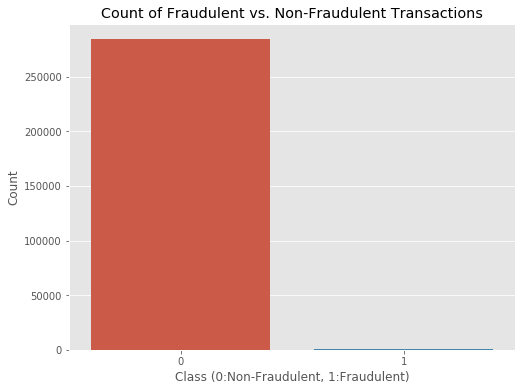

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x = counts.index, y = counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Thus, we find that our dataset is **highly unbalanced**. <br>
The number of non - fraudulent transactions is much high compared to the fraudulent transactions.

### 7. Separating the fraudulent and non - fraudulent parts of the dataset

In [13]:
# 'Class' = 1 - fraudulent transactions
fraud = df[df['Class'] == 1]
# 'Class' = 0 - non - fraudulent or normal transactions
normal = df[df['Class'] == 0] 

In [14]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


### 8. How different are the amount of money used in different transaction classes?

In [15]:
fraud.Amount.describe()

count     492.000
mean      122.211
std       256.683
min         0.000
25%         1.000
50%         9.250
75%       105.890
max      2125.870
Name: Amount, dtype: float64

In [16]:
normal.Amount.describe()

count    284315.000
mean         88.291
std         250.105
min           0.000
25%           5.650
50%          22.000
75%          77.050
max       25691.160
Name: Amount, dtype: float64

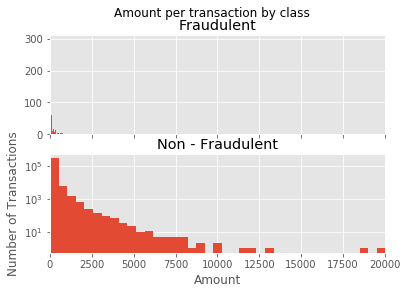

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraudulent')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Non - Fraudulent')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

### 9. Checking if fraudulent transactions occur more often during certain time frame

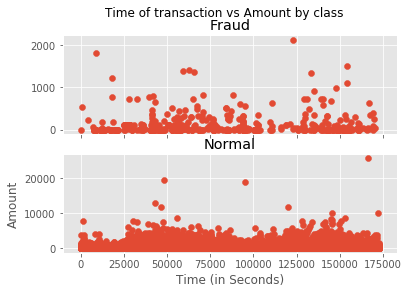

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### 10. Finding correlations - that is determining how different features affect the Class (Fraud or not)

In [19]:
corr = df.corr()
corr

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.697e-17 -1.424e-15  1.755e-17  6.391e-17   
V2     -0.011  4.697e-17  1.000e+00  2.512e-16 -1.126e-16 -2.040e-16   
V3     -0.420 -1.424e-15  2.512e-16  1.000e+00 -3.417e-16 -1.437e-15   
V4     -0.105  1.755e-17 -1.126e-16 -3.417e-16  1.000e+00 -1.941e-15   
V5      0.173  6.391e-17 -2.040e-16 -1.437e-15 -1.941e-15  1.000e+00   
V6     -0.063  2.398e-16  5.025e-16  1.432e-15 -2.713e-16  7.926e-16   
V7      0.085  1.992e-15  3.966e-16  2.169e-15  1.556e-16 -4.210e-16   
V8     -0.037 -9.491e-17 -4.414e-17  3.433e-16  5.196e-16  7.589e-16   
V9     -0.009  2.170e-16 -5.729e-17 -4.234e-16  3.860e-16  4.205e-16   
V10     0.031  7.434e-17 -4.782e-16  6.289e-16  6.055e-16 -6.602e-16   
V11    -0.248  2.439e-16  9.469e-16 -5.502e-17 -2.084e-16  7.343e-16   
V12     0.124  2.422e-16 -6.588e-16  2.207e-16 -5.658e-16  3.761e-16   
V13    -0.066 -2.115e-16  3.855e-16 -6.883e-16 -1.506e-16 -9.579e-16   
V14    -0.099  9.353e-16 -2.541e-16  4.271e-16 -8.522e-17 -3.635e-16   
V15    -0.183 -3.252e-16  2.831e-16  1.123e-16 -1.508e-16 -5.133e-16   
V16     0.012  6.309e-16  4.934e-17  1.183e-15 -6.939e-16 -3.517e-16   
V17    -0.073 -5.012e-16 -9.883e-16  4.577e-17 -4.398e-16  1.426e-16   
V18     0.090  2.870e-16  2.637e-16  5.428e-16  1.494e-16  1.110e-15   
V19     0.029  1.818e-16  9.528e-17  2.577e-16 -2.657e-16 -3.138e-16   
V20    -0.051  1.037e-16 -9.310e-16 -9.429e-16 -3.223e-16  2.076e-16   
V21     0.045 -1.755e-16  8.444e-17 -2.972e-17 -9.977e-17 -1.369e-16   
V22     0.144  7.477e-17  2.501e-16  4.648e-16  2.100e-16  5.060e-16   
V23     0.051  9.809e-16  1.060e-16  2.115e-17  6.003e-17  1.638e-16   
V24    -0.016  7.354e-17 -8.142e-18 -9.352e-17  2.230e-16 -9.286e-16   
V25    -0.233 -9.805e-16 -4.262e-17  4.771e-16  5.395e-16  5.625e-16   
V26    -0.041 -8.622e-17  2.602e-16  6.522e-16 -6.180e-16  9.145e-16   
V27    -0.005  3.208e-17 -4.478e-16  6.240e-16 -6.403e-17  4.466e-16   
V28    -0.009  9.821e-16 -3.676e-16  7.727e-16 -5.864e-17 -3.299e-16   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9  ...        V21        V22  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03  ...  4.474e-02  1.441e-01   
V1      2.398e-16  1.992e-15 -9.491e-17  2.170e-16  ... -1.755e-16  7.477e-17   
V2      5.025e-16  3.966e-16 -4.414e-17 -5.729e-17  ...  8.444e-17  2.501e-16   
V3      1.432e-15  2.169e-15  3.433e-16 -4.234e-16  ... -2.972e-17  4.648e-16   
V4     -2.713e-16  1.556e-16  5.196e-16  3.860e-16  ... -9.977e-17  2.100e-16   
V5      7.926e-16 -4.210e-16  7.589e-16  4.205e-16  ... -1.369e-16  5.060e-16   
V6      1.000e+00  1.429e-16 -1.707e-16  1.114e-16  ... -1.576e-16 -3.363e-16   
V7      1.429e-16  1.000e+00 -8.692e-17  7.933e-16  ...  1.939e-16 -1.058e-15   
V8     -1.707e-16 -8.692e-17  1.000e+00  2.901e-16  ... -2.412e-16  5.476e-16   
V9      1.114e-16  7.933e-16  2.901e-16  1.000e+00  ...  4.578e-17  2.872e-17   
V10     2.851e-16  3.043e-17  9.052e-17 -2.772e-16  ...  8.090e-16 -6.708e-16   
V11     4.866e-16 -1.084e-15  1.955e-16  4.682e-16  ... -3.912e-16 -3.812e-17   
V12     2.141e-16  1.510e-15 -6.266e-17 -2.445e-15  ...  3.230e-16 -5.904e-16   
V13    -2.268e-16 -9.892e-17 -2.383e-16 -2.650e-16  ...  9.499e-17 -2.660e-17   
V14     3.453e-16 -1.729e-16 -1.131e-16  2.343e-16  ...  1.634e-17  3.440e-16   
V15    -6.368e-18  1.937e-17  2.021e-16 -1.588e-15  ...  1.947e-17 -8.937e-16   
V16    -2.478e-16  2.894e-16  5.027e-16 -3.252e-16  ... -3.927e-16  3.878e-17   
V17     3.568e-16  1.150e-15 -3.509e-16  6.536e-16  ... -7.754e-16 -8.390e-16   
V18     2.811e-16 -1.117e-16 -4.094e-16  1.204e-16  ... -1.141e-15 -8.663e-17   
V19     2.717e-16 -2.874e-16 -5.340e-16  1.121e-16  ...  4.033e-16 -9.690e-16   
V20

Text(0.5, 1, 'Heatmap of Correlation')

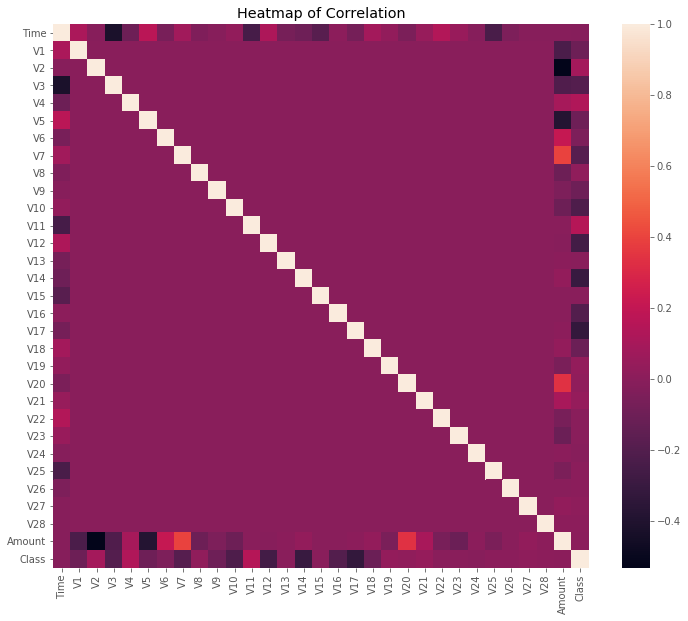

In [20]:
# heatmap - uses color in order to communicate a value to the reader.
corr = df.corr()
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr)
plt.title('Heatmap of Correlation')

From the heatmap, we get an idea of to what degree different features contribute to the transaction being fraudulent or not.

In [21]:
# skewness
# Finding the skewness of the features 
# to ensure that they are not much deviated from the Gaussian distribution
# As presence of much skewness in features may violate our training algo assumptions
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

# Data Preprocessing

### 1. Scaling Amount and Time

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
# scaling the time column
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [23]:
# scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [24]:
# concatenating newly created scaled columns with original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
# viewing a random sample of items from an axis of the object
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
61279    49745.0  0.974 -0.349  1.263  0.722 -0.430  1.549 -0.949  0.647   
39          29.0  1.111  0.169  0.517  1.325 -0.192  0.020 -0.032  0.118   
144131   85884.0 -2.409  2.473 -0.194 -0.392 -1.036 -0.916 -0.633  1.586   
202372  134294.0 -1.367  2.075 -1.456 -1.559  0.980 -1.286  1.520 -0.223   
93999    64685.0  0.099 -1.198  0.153  2.727 -0.581  0.236  0.690 -0.057   

           V9  ...    V23    V24    V25    V26    V27    V28  Amount  Class  \
61279   0.877  ...  0.199 -0.585 -0.100  0.425  0.090  0.016    7.69      0   
39      0.018  ... -0.048  0.232  0.606 -0.342  0.037  0.007    6.54      0   
144131 -1.155  ...  0.194  0.287 -0.289 -0.121 -0.730 -0.064    5.99      0   
202372  0.576  ... -0.217 -0.380 -0.019  0.123  1.018  0.622    2.31      0   
93999  -1.020  ... -0.349 -0.025 -0.013 -0.385 -0.108  0.114  551.81      0   

        scaled_amount  scaled_time  
61279          -0.322       -0.949  
39             -0.327       -1.996  
144131         -0.329       -0.188  
202372         -0.344        0.831  
93999           1.853       -0.634  

[5 rows x 33 columns]

In [25]:
# dropping old (unscaled) amount and time columns
df.drop(['Amount', 'Time'], axis = 1, inplace = True)

### 2. Splitting Data into Train and Test sets

In [26]:
# manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256177, 31)
Test Shape: (28630, 31)


In [27]:
# resetting the indices 
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

### 3. Creating a subsample data set with balanced class distributions

In [28]:
# how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 442 fraudulent transactions in the train data.


In [29]:
# storing the non - fraudulent and fraudulent transactions in the train data
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [30]:
# randomly selecting 449 random non - fraudulent transactions
selected = non_fraud.sample(no_of_frauds)
selected.shape

(442, 31)

In [31]:
# printing the first 5 selected items
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
43219  -0.727  0.622  2.224  1.067 -0.385  0.666  0.044  0.434  1.013 -0.525   
183826 -0.157  0.162  0.077 -2.289  0.037 -1.247  0.855 -0.337 -1.168  0.138   
80765   1.329 -0.653  0.260 -0.794 -0.811 -0.038 -0.747  0.117 -0.911  0.834   
250795  2.012  0.072 -1.618  0.340  0.376 -0.585  0.038 -0.047  0.294 -0.204   
70298   1.208  0.274  0.224  1.266  0.177  0.118  0.115 -0.036  0.188 -0.149   

        ...    V22    V23    V24    V25    V26    V27    V28  Class  \
43219   ... -0.635 -0.026  0.030 -0.018 -0.541  0.248  0.127      0   
183826  ...  1.601 -0.145 -0.052 -0.280 -0.129  0.395  0.265      0   
80765   ... -0.092 -0.030 -0.265  0.227  1.195 -0.046 -0.011      0   
250795  ... -0.815  0.363  0.597 -0.343  0.150 -0.066 -0.041      0   
70298   ... -0.070 -0.131 -0.393  0.762 -0.284  0.046  0.012      0   

        scaled_amount  scaled_time  
43219          -0.317       -1.081  
183826         -0.106        0.851  
80765          -0.321       -0.675  
250795         -0.350        1.551  
70298          -0.336       -0.787  

[5 rows x 31 columns]

In [32]:
# resetting the indices
selected.reset_index(drop = True, inplace = True)
fraud.reset_index(drop = True, inplace = True)

In [33]:
# concatenating both (449 fraud and non - fraud transactions) 
# into a subsample data set with equal class distribution
subsample = pd.concat([selected, fraud])
len(subsample) # 449 (fraud) + 449 (non - fraud) = 898

884

In [34]:
# shuffling our data set
subsample = subsample.sample(frac = 1).reset_index(drop = True)

subsample.head(10)

V1     V2      V3     V4     V5     V6     V7      V8     V9     V10  \
0 -5.454  8.287 -12.753  8.594 -3.106 -3.180 -9.253   4.245 -6.330 -13.137   
1  1.207 -0.259  -0.559  0.296  1.705  3.981 -0.976   1.026  0.590  -0.057   
2 -3.552  5.426  -3.732  6.679 -2.188  2.434 -8.748 -12.108 -2.856  -5.666   
3 -2.533 -2.899  -4.794 -1.548 -3.812  1.900  6.734  -1.681 -1.421   0.218   
4 -1.001  3.347  -5.534  6.836 -0.300  0.096 -2.440   1.286 -2.766  -4.458   
5 -0.103  0.682  -0.591 -0.083  0.792 -1.326  1.067  -0.259 -0.026  -0.819   
6 -0.639 -0.086   1.265  1.401 -0.261  1.010  1.302  -0.135 -0.432  -0.091   
7 -7.428  2.948  -8.679  5.185 -4.761 -0.957 -7.773   0.717 -3.682  -8.403   
8  1.214 -0.828   0.489 -0.714 -1.189 -0.407 -0.672   0.024 -0.880   0.801   
9 -4.384  3.265  -3.077  3.404 -1.938 -1.221 -3.310  -1.112 -1.978  -3.288   

   ...    V22    V23    V24    V25    V26    V27    V28  Class  scaled_amount  \
0  ... -0.267 -0.311 -1.202  1.352  0.608  1.575  0.809      1         -0.349   
1  ...  0.180 -0.180  1.032  0.801 -0.185  0.059  0.025      0         -0.285   
2  ...  2.511  0.954 -0.543 -0.620  0.406  0.023  0.165      1         -0.219   
3  ...  1.975 -0.918  0.584 -1.130 -0.196  1.229 -1.253      0          5.546   
4  ... -0.694  0.300 -0.658  0.102  0.430  0.825  0.327      1          0.391   
5  ...  1.021 -0.007 -0.152 -0.287 -0.134  0.362  0.200      0         -0.079   
6  ...  0.760  0.353 -0.779 -0.071 -0.033 -0.062 -0.063      1          0.807   
7  ...  0.610  0.789 -0.565  0.201 -0.111  1.145  0.102      1          0.168   
8  ... -1.349  0.149 -0.017 -0.147  0.742 -0.064  0.017      0         -0.033   
9  ... -0.990 -0.330  0.158  0.006 -0.494 -1.538 -0.994      1         -0.171   

   scaled_time  
0       -1.716  
1       -0.464  
2        0.031  
3        0.822  
4        0.305  
5        0.955  
6       -0.658  
7       -0.825  
8       -0.314  
9       -0.758  

[10 rows x 31 columns]

### 4. Visualisation of fraud and non - fraud classes in subsample dataset created

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

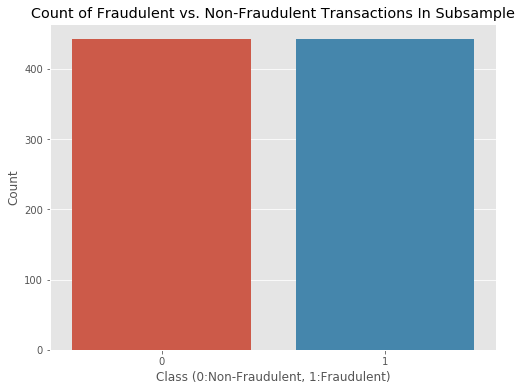

In [35]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

We find that, the distribution of fraud and non - fraud transactions is balanced in our subsample dataset unlike the original highly unbalanced dataset

In [36]:
# taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.430
V2             0.485
V3            -0.566
V4             0.724
V5            -0.360
V6            -0.380
V7            -0.474
V8             0.046
V9            -0.557
V10           -0.625
V11            0.686
V12           -0.683
V13           -0.056
V14           -0.749
V15           -0.033
V16           -0.600
V17           -0.558
V18           -0.466
V19            0.298
V20            0.198
V21            0.124
V22            0.012
V23           -0.009
V24           -0.087
V25            0.015
V26            0.050
V27            0.058
V28            0.091
Class          1.000
scaled_amount  0.082
scaled_time   -0.127

In [37]:
# negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.566
V9  -0.557
V10 -0.625
V12 -0.683
V14 -0.749
V16 -0.600
V17 -0.558

In [38]:
# positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.724
V11    0.686
Class  1.000

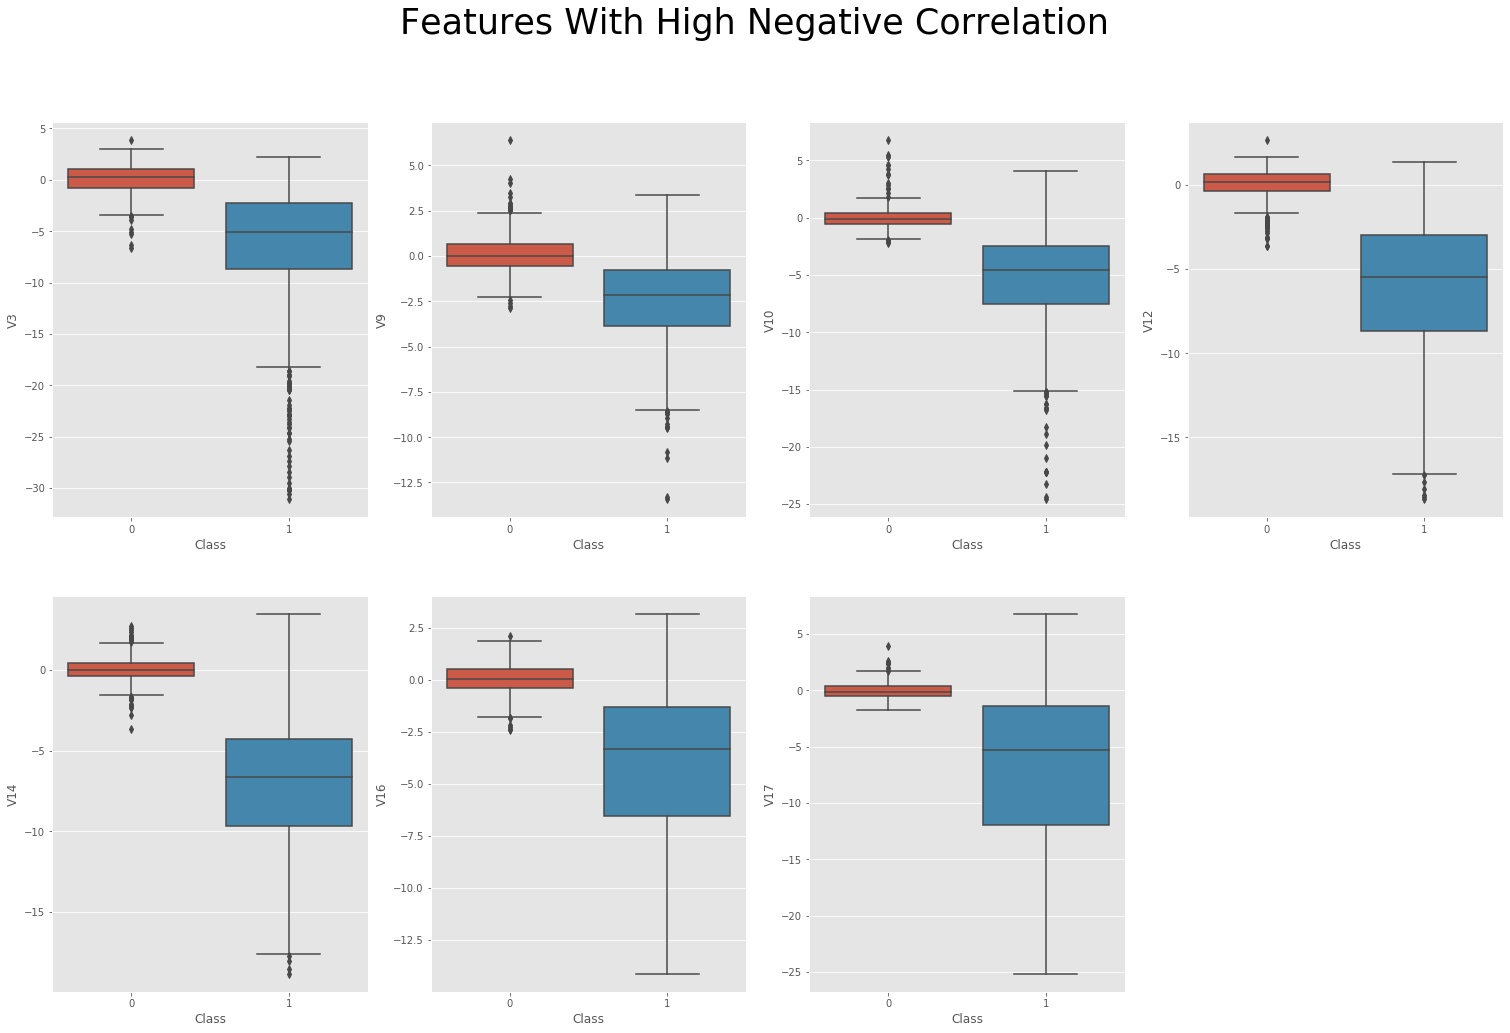

In [39]:
# visualizing the features with high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

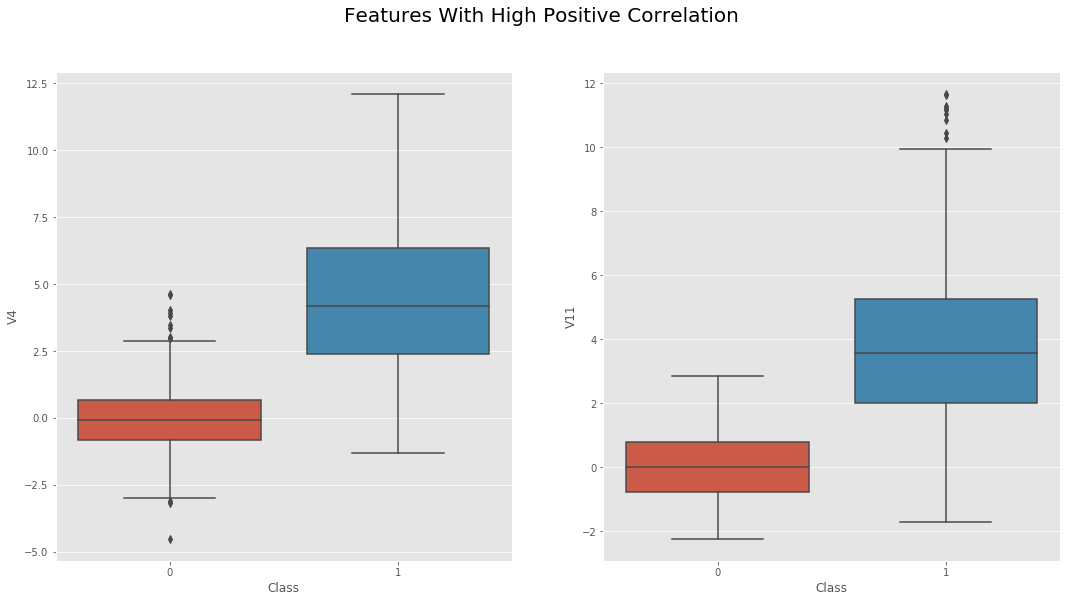

In [40]:
# visualizing the features with high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

### 5. Extreme Outlier Removal

In [41]:
# Only removing the extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [42]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 884 transactions by 261 transactions to 623 transactions.


### 6. Dimensionality Reduction

In [43]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [44]:
# t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

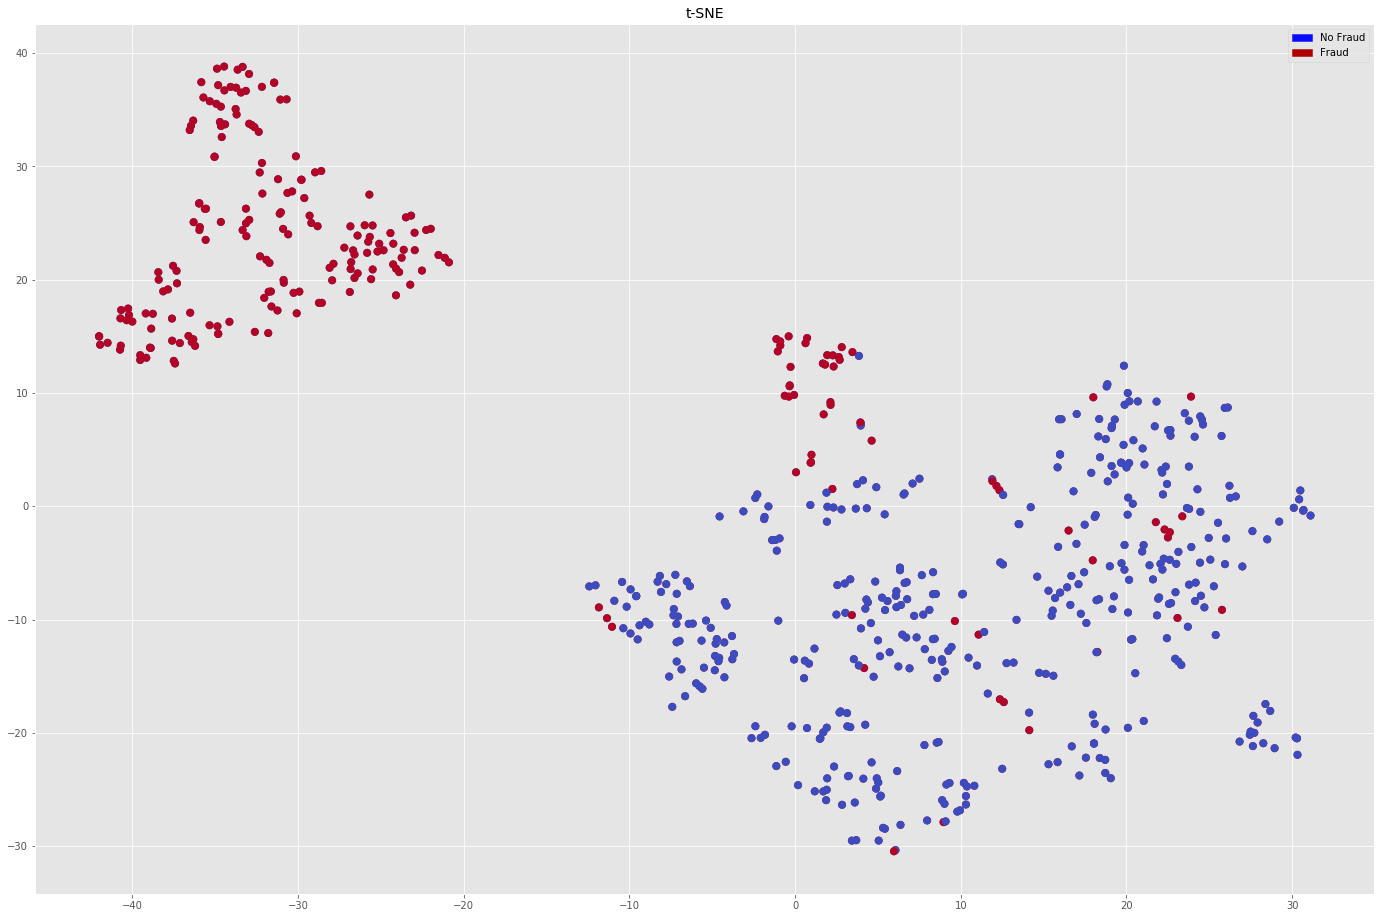

In [45]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


# Classification Algorithms

In [46]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [47]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
conda install -c anaconda py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


## Spot - Checking Algorithms 

Spot-checking algorithms is about getting a quick assessment of a bunch of different algorithms on your machine learning problem so that you know what algorithms to focus on and what to discard.

In [74]:
# Spot - Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

In [75]:
# testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.965945 (0.027188)
LDA: 0.971238 (0.026478)
KNN: 0.957539 (0.037261)
CART: 0.902679 (0.026227)
SVM: 0.976034 (0.019182)
XGB: 0.972633 (0.023923)
RF: 0.971371 (0.027211)


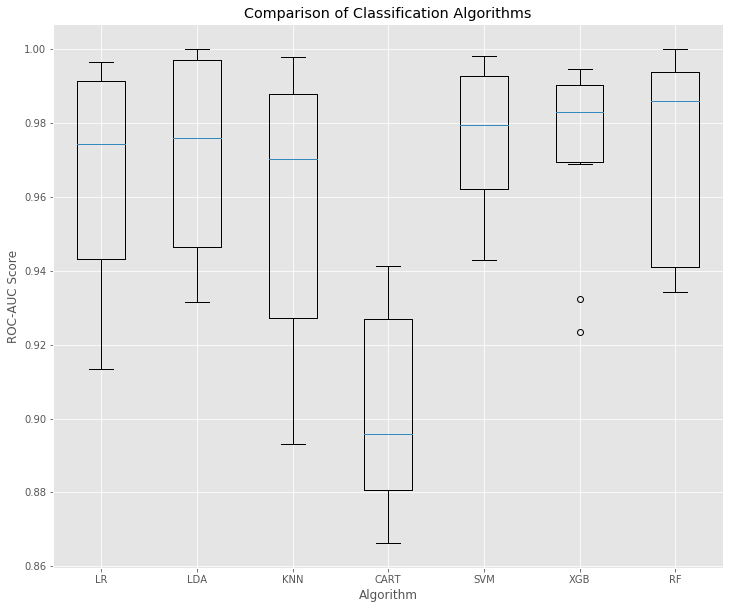

In [76]:
# Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

We find that RF, XGBOOST Algorithms give the greatest test accuracy and hence proceed with this algorithm to train our model

In [77]:
conda install -c anaconda graphviz 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [78]:
# visualizing RF
RandomForest_model = RandomForestClassifier(n_estimators = 10)

# Train
RandomForest_model.fit(X_train, y_train)

# Extract single tree
estimator = RandomForest_model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [80]:
# testing the model 
RandomForest_predict = RandomForest_model.predict(X_test)

In [81]:
# printing the test set results
print(RandomForest_predict)

[0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [82]:
# Checking different accuracies for the RF model

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,recall_score

rf_accuracy = accuracy_score(y_test, RandomForest_predict)
rf_recall = recall_score(y_test, RandomForest_predict)
rf_cm = confusion_matrix(y_test, RandomForest_predict)
rf_auc = roc_auc_score(y_test, RandomForest_predict)

print("Model has a Score Accuracy: {:.3%}".format(rf_accuracy))
print("Model has a Score Recall: {:.3%}".format(rf_recall))
print("Model has a Score ROC AUC: {:.3%}".format(rf_auc))

Model has a Score Accuracy: 94.400%
Model has a Score Recall: 86.364%
Model has a Score ROC AUC: 92.565%


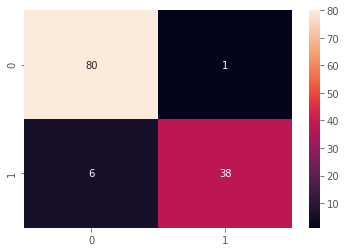

In [83]:
import seaborn as sns
sns.heatmap(rf_cm, annot = True)

Here, 0 indicates non - fraudulent transactions and 1 indicates fraudulent transactions. As seen from the confusion matrix, our RF model correctly predicted **80** transactions as non - fraudulent ( **True Negatives** ) and **38** transactions as fraudulent ( **True Positives** ). Whereas, **6** transactions which were fraudulent are predicted to be non - fraudulent ( **False Negatives** ) and **1** non - fraudulent transaction is predicted to be fraudulent ( **False positives** ). This can be visualised better as follows -

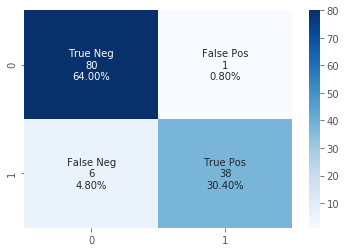

In [84]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rf_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     rf_cm.flatten()/np.sum(rf_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rf_cm, annot=labels, fmt='', cmap='Blues')

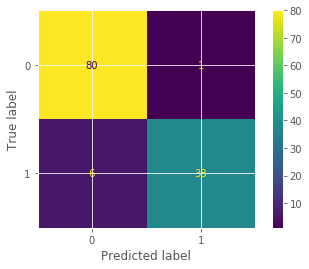

In [85]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RandomForest_model , X_test, y_test)
plt.show()

Thus, random forest model performs fairly well for the given highly unbalanced dataset. But, we have 6 false negatives and a false positive here. That is, the fraudulent transactions are detected to be safe or normal ones, which is not a good outcome. Therefore, let us see if we can improve our results further by using the XGBoost Algorithm.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [91]:
xgb_predict = xgb.predict(X_test)

In [92]:
xgb_accuracy = accuracy_score(y_test, xgb_predict)
xgb_recall = recall_score(y_test, xgb_predict)
xgb_cm = confusion_matrix(y_test, xgb_predict)
xgb_auc = roc_auc_score(y_test, xgb_predict)

print("Model has a Score Accuracy: {:.3%}".format(xgb_accuracy))
print("Model has a Score Recall: {:.3%}".format(xgb_recall))
print("Model has a Score ROC AUC: {:.3%}".format(xgb_auc))

Model has a Score Accuracy: 95.200%
Model has a Score Recall: 88.636%
Model has a Score ROC AUC: 93.701%


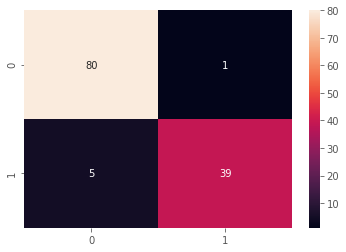

In [89]:
import seaborn as sns
sns.heatmap(xgb_cm, annot = True)

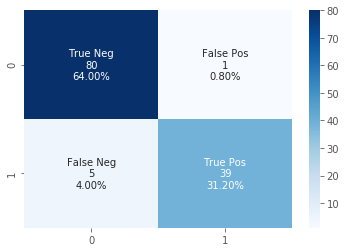

In [93]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                xgb_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     xgb_cm.flatten()/np.sum(xgb_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(xgb_cm, annot=labels, fmt='', cmap='Blues')

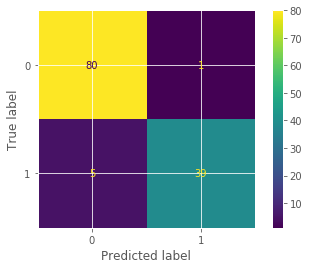

In [94]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb , X_test, y_test)
plt.show()

Thus, we find that XGBoost model outperforms RF model by a very slight margin. Thus, it would be appropriate to use any of the two for our task.